## Hybrid DL Model

Using supervised and unsupervised learning - ANN and SOM
Use the outputs of the SOM as input to the ANN

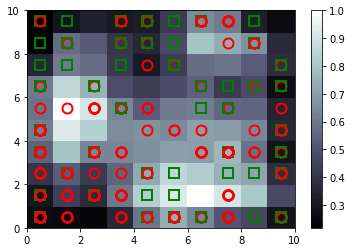

In [2]:
# Self Organizing Map

# Importing the libraries
import numpy as np
from pylab import bone, pcolor, colorbar, plot, show
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [3]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,6)], mappings[(7,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [4]:
len(frauds)

83

In [5]:
#Remove the customerID and keep the class this time
customers = dataset.iloc[:, 1:].values

In [8]:
#Create the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [10]:
#ANN
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [11]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

/Users/aoife.whelan/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/2
690/690 [==============================] - 1s - loss: 0.5408 - acc: 0.8797     
Epoch 2/2
690/690 [==============================] - 1s - loss: 0.3685 - acc: 0.8797     


In [12]:
# Part 3 - Making predictions and evaluating the model
# Predicting the probabilities of fraud
y_pred = classifier.predict(customers)

In [14]:
#Create a 2D array of customer IDs and probabilities
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred), axis=1)

In [16]:
#Sort the array to rank the probabilities
y_pred = y_pred[y_pred[:,1].argsort()]

In [17]:
y_pred

array([[1.55986140e+07, 1.44417761e-02],
       [1.56548590e+07, 1.48792202e-02],
       [1.57734210e+07, 1.50766009e-02],
       ...,
       [1.56170650e+07, 3.55298698e-01],
       [1.57872290e+07, 3.55298698e-01],
       [1.57631940e+07, 3.55298698e-01]])